Graph measuring computation time is given (OX
number of total iterations, OY - computational
time, two plots - one for numba version, the other
for regular version)

Mandelbrot code is profiled
Numba is used
Acceleration using numb achieved

In [1]:
import io
import imageio

import numpy as np
import matplotlib.pyplot as plt

from numba import jit, njit, prange
from PIL import Image

Julia map:
$$z_{n+1} = z_n^2 + C$$

In [2]:
def get_julia_set(Re, Im, C=0, num_steps=100, limit=100):
    z_matrix = Re + np.expand_dims(Im, 1) * 1j
    julia = np.zeros_like(z_matrix, dtype=int)

    for _ in range(num_steps):
        indexes = np.abs(z_matrix) < limit
        z_matrix[indexes] = z_matrix[indexes]**2 + C
        julia[np.abs(z_matrix) > limit] += 1

    return julia

In [3]:
@njit(fastmath=True)
def get_julia_set_jit(Re, Im, C=0, steps=100, lim=100):
    z_matrix = Re + np.expand_dims(Im, 1) * 1j
    julia = np.zeros_like(z_matrix, dtype=int)

    for _ in range(steps):
        indexes = np.abs(z_matrix) < lim
        z_matrix[indexes] = z_matrix[indexes]**2 + C
        julia[np.abs(z_matrix) > lim] += 1

    return julia

In [4]:
Re = np.linspace(-1, 1, 200)
Im = np.linspace(-1, 1, 200)
julia = get_julia_set_jit(Re, Im)

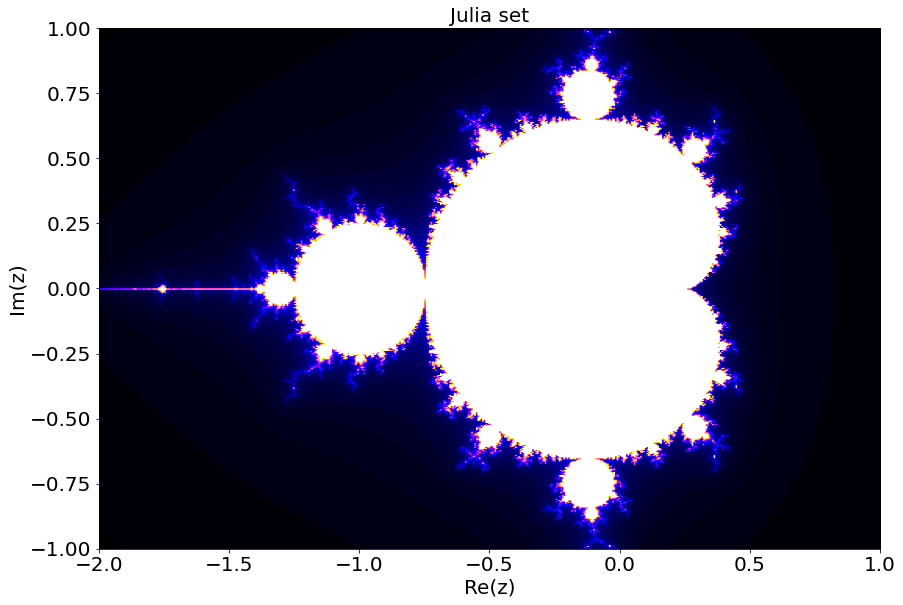

In [5]:
plt.figure(figsize=(14, 11))
plt.imshow(julia, cmap='gnuplot2', extent=(-2, 1, -1, 1))
plt.title('Julia set', fontsize=20)
plt.xlabel('Re(z)', fontsize=20)
plt.ylabel('Im(z)', fontsize=20)
plt.tick_params(labelsize=20)

## Profile

In [6]:
import cProfile

cProfile.run('get_julia_set_jit(Re, Im)')

         5 function calls in 0.016 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.016    0.016    0.016    0.016 1034343761.py:11(get_julia_set_jit)
        1    0.000    0.000    0.016    0.016 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 serialize.py:29(_numba_unpickle)
        1    0.000    0.000    0.016    0.016 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




## Graph

In [7]:
steps = np.arange(1, 1001, 100)

In [8]:
time_np = np.zeros(steps.size)
time_jit = np.zeros(steps.size)
for i, step in enumerate(steps):
    print(f'\r{i+1}/{steps.size}', end='')
    time = %timeit -o -q -r 10 -n 3 get_julia_set(Re, Im, steps=step)
    time_np[i] = time.best

    time = %timeit -o -q -r 10 -n 3  get_julia_set_jit(Re, Im, steps=step)
    time_jit[i] = time.best

10/10

Text(0, 0.5, 'Computation time')

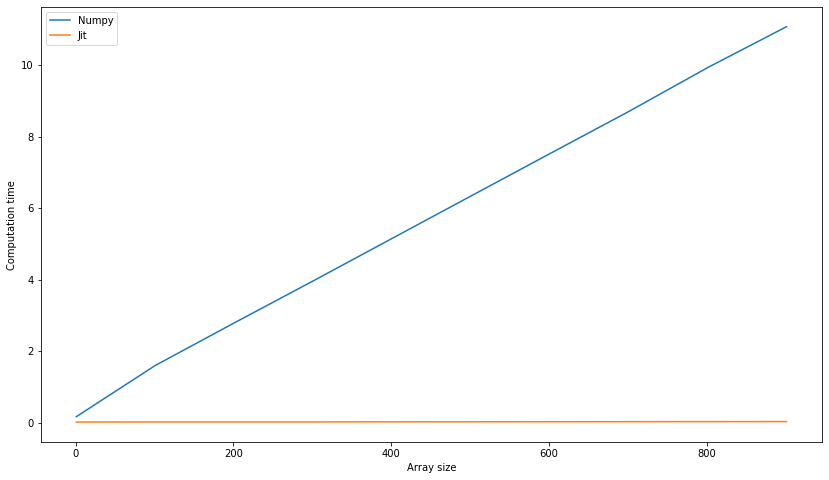

In [9]:
plt.figure(figsize=(14, 8))
plt.plot(steps, time_np, label='Numpy')
plt.plot(steps, time_jit, label='Jit')
plt.legend()
plt.xlabel('Array size')
plt.ylabel('Computation time')

Text(0, 0.5, 'Computation time')

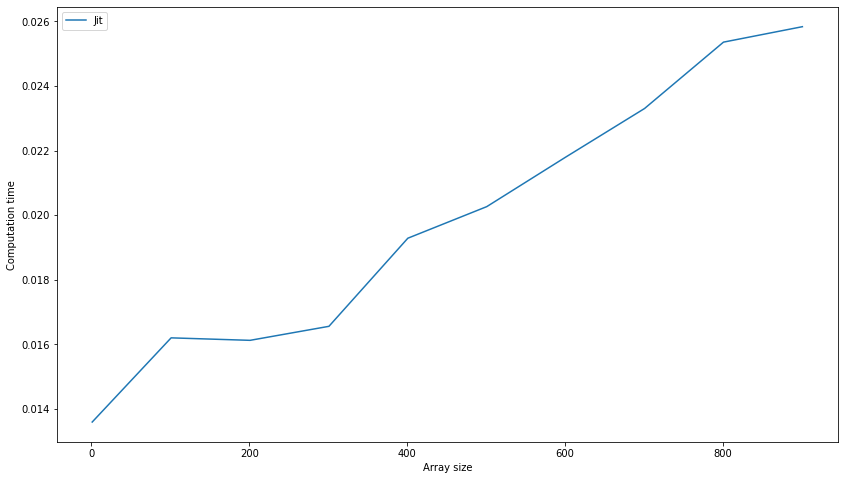

In [10]:
plt.figure(figsize=(14, 8))
plt.plot(steps, time_jit, label='Jit')
plt.legend()
plt.xlabel('Array size')
plt.ylabel('Computation time')